In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load data
def load_reports(directory_path):
    csv_files = glob.glob(os.path.join(directory_path, "*Report.csv"))
    reports = []
    for file in csv_files:
        reports.append(pd.read_csv(file, index_col=0, low_memory=False))
    return pd.concat(reports, ignore_index=True)

reports = load_reports("data")

In [3]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34044 entries, 0 to 34043
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  34044 non-null  object 
 1   Year                  34044 non-null  object 
 2   Month                 34044 non-null  object 
 3   Week_of_Year          34044 non-null  object 
 4   Week_of_Month         34044 non-null  object 
 5   BU_Name               34044 non-null  object 
 6   SalesGrouping         34044 non-null  object 
 7   Flow_Name             34044 non-null  object 
 8   Flow_Source           34044 non-null  object 
 9   Flow_Destination      34044 non-null  object 
 10  SP_Name               34033 non-null  object 
 11  NWB Export Account    34044 non-null  object 
 12  NWB Exp Stockp        34040 non-null  object 
 13  Act_Acc_No            5289 non-null   float64
 14  Act Export Account    34044 non-null  object 
 15  Act Exp Stockp     

In [4]:
reports.head()

,Date,Year,Month,Week_of_Year,Week_of_Month,BU_Name,SalesGrouping,Flow_Name,Flow_Source,Flow_Destination,...,THT,TFR Delay subtracted,TLT,Plan Note External,Act Note External,CX_Group,CX_Reason,Cancellation Notes,Actual Notes,FirstOfEntry_ID
0,2009-01-01 00:00:00,2009,1,1,1,Location54,Exports,Location54 to Location125 FOR - Coking Coal,Location54,Location125,...,5.916667,0.0,4.583333,Train 8077865078 planned for 2009/01/02 arrive...,Train 8077865078 was planned for 2009/01/02 bu...,None,No Cancellation,None,NaN,1650
1,2009-01-01 00:00:00,2009,1,1,1,Location74,Domestic Clients,Location74 to Location73,Location74,Location76,...,NaN,0.0,NaN,Train did not run,NaN,None,No Cancellation,None,NaN,955
2,2009-01-01 00:00:00,2009,1,1,1,Location74,Domestic Clients,Location74 to Location160,Location74,Location176,...,NaN,0.0,NaN,Train did not run,NaN,None,No Cancellation,None,NaN,979
3,2009-01-01 00:00:00,2009,1,1,1,Location74,Location38,Location74 to Location82,Location74,Location82,...,1.416667,0.0,1.416667,NaN,Train was not planned,None,No Cancellation,None,NaN,910
4,2009-01-01 00:00:00,2009,1,1,1,Location74,Location38,Location74 to Location82,Location74,Location82,...,2.000000,0.0,2.000000,NaN,NaN,None,No Cancellation,None,NaN,909


In [5]:
# check the duplicates 
reports.duplicated().value_counts()

False    34044
dtype: int64

- **Identify columns that can explain train delays**

In [6]:
reports[['Train Status','T2','Source_TAT_SD','THT','TFR Delay subtracted','CX_Group']]

,Train Status,T2,Source_TAT_SD,THT,TFR Delay subtracted,CX_Group
0,Train Ran,2009-01-01 02:25:00,7.0,5.916667,0.0,None
1,Train Cancelled,NaT,6.0,NaN,0.0,None
2,Train Cancelled,NaT,6.0,NaN,0.0,None
3,Extra Train,2009-01-01 11:20:00,6.0,1.416667,0.0,None
4,Train Ran,2009-01-01 02:45:00,6.0,2.000000,0.0,None
...,...,...,...,...,...,...
34039,Not executed yet,NaT,4.0,NaN,0.0,None
34040,Not executed yet,NaT,4.0,NaN,0.0,None
34041,Not executed yet,NaT,4.0,NaN,0.0,None
34042,Not executed yet,NaT,4.0,NaN,0.0,None


1. Total types of train status

In [7]:
reports['Train Status'].value_counts()

Train Ran                  23027
Train Cancelled             6014
Train Plan Not Approved     2770
Extra Train                 2213
Not executed yet              20
Name: Train Status, dtype: int64

<AxesSubplot: title={'center': 'Train Status Chart'}, xlabel='Train Status'>

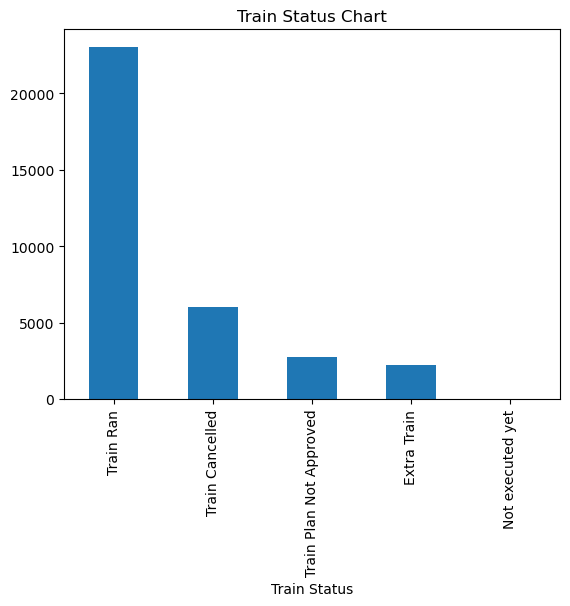

In [8]:
# Create a bar plot
reports['Train Status'].value_counts().plot(kind='bar', title='Train Status Chart', xlabel='Train Status')

2. What's the distribution of allowed delay

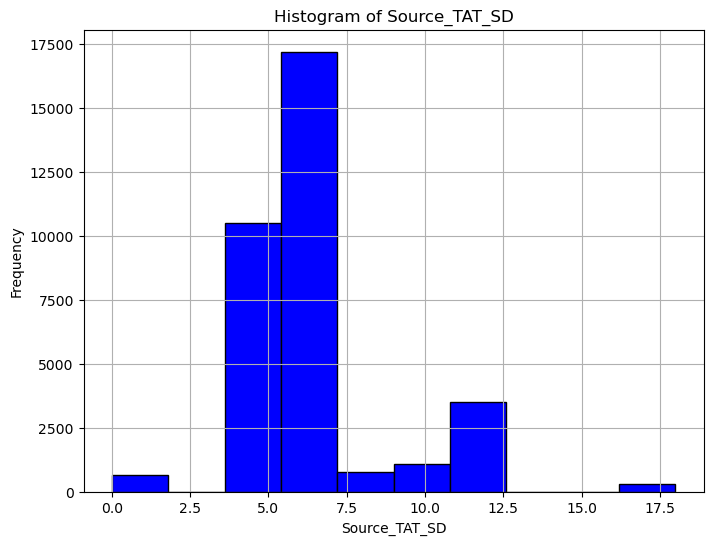

In [9]:
# Plot a histogram of the 'Source_TAT_SD' column
plt.figure(figsize=(8, 6))
plt.hist(reports['Source_TAT_SD'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Source_TAT_SD')
plt.xlabel('Source_TAT_SD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

3. What's the distribution of actual delay

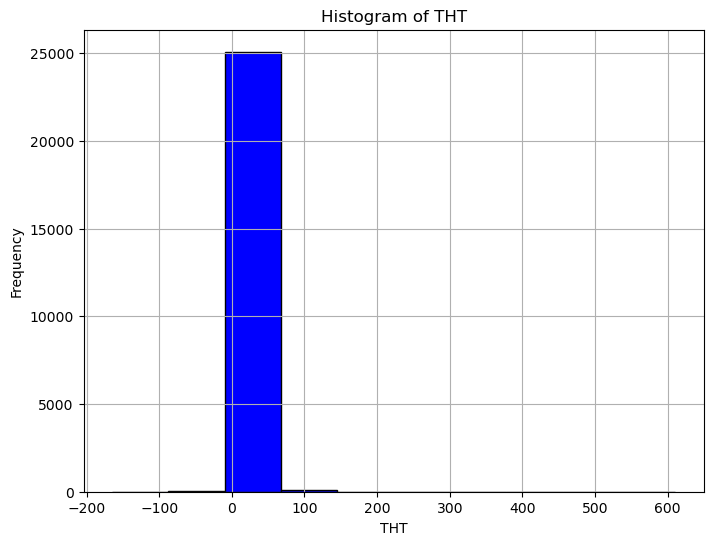

In [10]:
# Plot a histogram of the 'Source_TAT_SD' column
plt.figure(figsize=(8, 6))
plt.hist(reports['THT'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of THT')
plt.xlabel('THT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- On an average actual delay is much higher than allowed delay from above two histograms

4. Cancellation group analysis

In [11]:
reports['CX_Group'].value_counts()

None           28130
Location172     3859
Client           967
BU               874
Marketing        111
Location125       77
Logistics         18
Name: CX_Group, dtype: int64

- **Create a new feature of positive delays (THT)**

In [12]:
reports['train_delay'] = reports['THT'].map(lambda x: 'pos' if x > 0.0 else 'neg')

In [13]:
reports['train_delay'].value_counts()

pos    25197
neg     8847
Name: train_delay, dtype: int64

<AxesSubplot: >

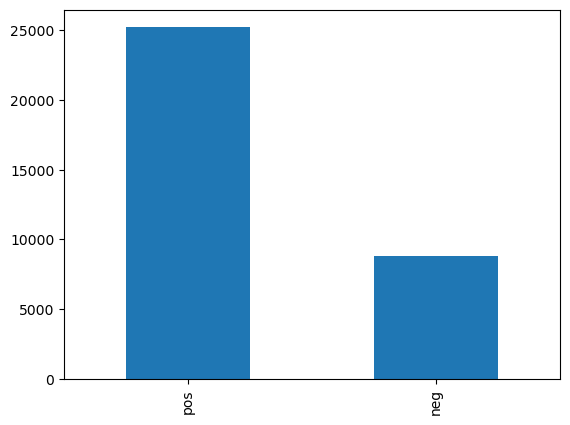

In [14]:
reports['train_delay'].value_counts().plot(kind='bar')

- 25197 rows are having train delay among all the records

### Analysis of reasons behind the train delay using bi-variate and multi-variate analysis

In [26]:
# cross tab
def train_delay_cancel(feature1):
    cross_tab = pd.crosstab(reports[feature1], reports['train_delay'])
    return pd.DataFrame(cross_tab)

def stack_viz(feature1):
    cross_tab = pd.crosstab(reports[feature1], reports['train_delay'])
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar Plot of {feature1} vs. Start_diff')
    plt.xlabel(f'{feature1}')
    plt.ylabel('Count')
    plt.show()

1. By train status

In [16]:
train_delay_cancel('Train Status')

train_delay,neg,pos
Train Status,,
Extra Train,3,2210
Not executed yet,20,0
Train Cancelled,6014,0
Train Plan Not Approved,2770,0
Train Ran,40,22987


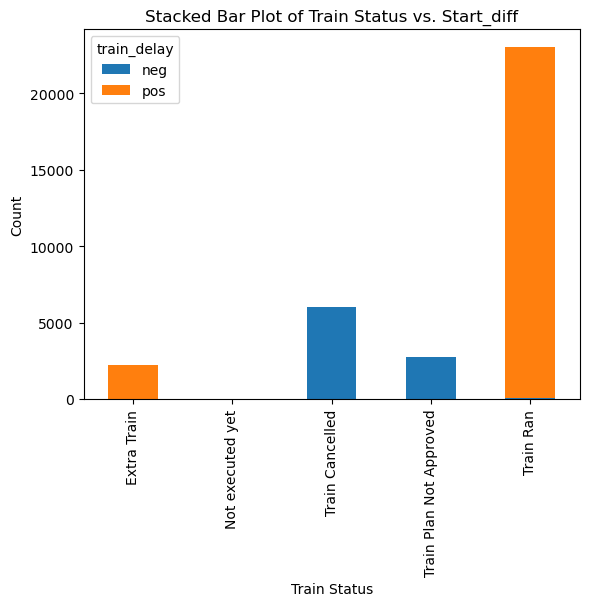

In [27]:
stack_viz('Train Status')

2. By CX group and CX_reason

In [17]:
train_delay_cancel('CX_Group')

train_delay,neg,pos
CX_Group,,
BU,872,2
Client,965,2
Location125,77,0
Location172,3849,10
Logistics,18,0
Marketing,111,0
None,2954,25176


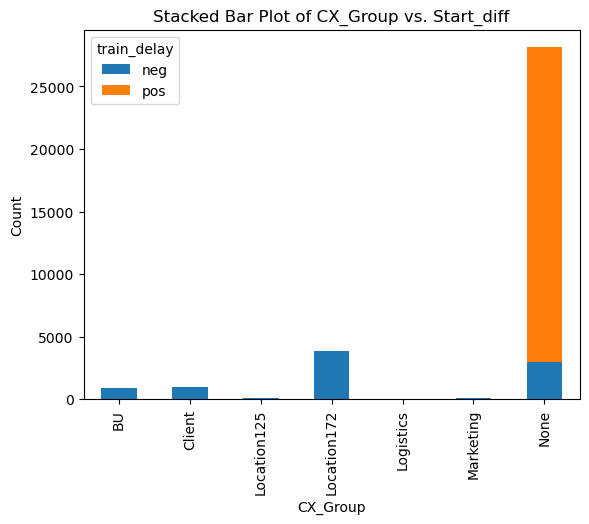

In [28]:
stack_viz('CX_Group')

- In train status it shows that no trains which are delayed have been in cancellation status while in cancellation group there few trains which are cancelled by some reasons and delayed as well.
- Here, It could be some discrepancy or incorrect data has been recorded. 

In [18]:
train_delay_cancel('CX_Reason')

train_delay,neg,pos
CX_Reason,,
"""Normals"" not available",97,0
Bad weather conditions,45,0
Blocked section,124,0
Breakdown,248,2
Broken rail,17,0
CTC out of order,77,0
Changing client priority,447,0
Crew time out,88,0
Cross point running late,63,0


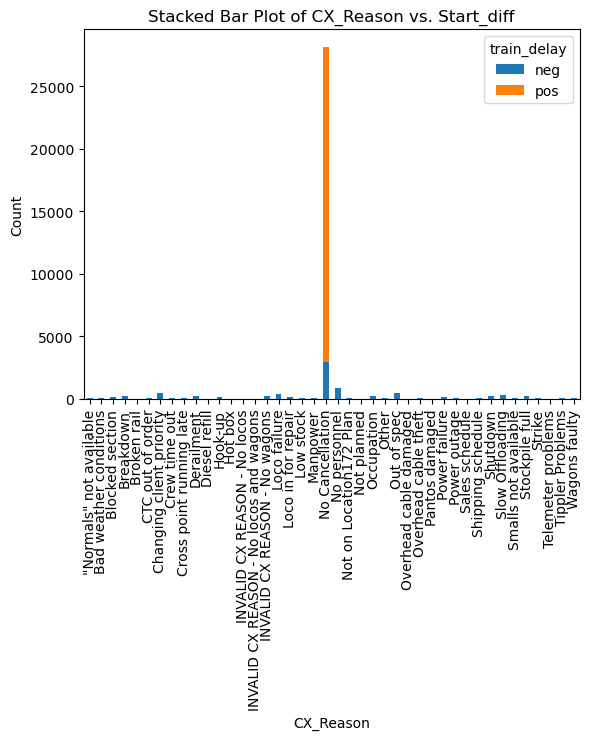

In [29]:
stack_viz('CX_Reason')

- We can learn the reasons due to which 14 trains were cancelled and possibly delayed.

3. By BU name

In [19]:
train_delay_cancel('BU_Name')

train_delay,neg,pos
BU_Name,,
Location103,61,251
Location109,578,541
Location13,96,218
Location15,6,25
Location154,11,31
Location175,79,89
Location181,24,103
Location184,10,18
Location22,98,578


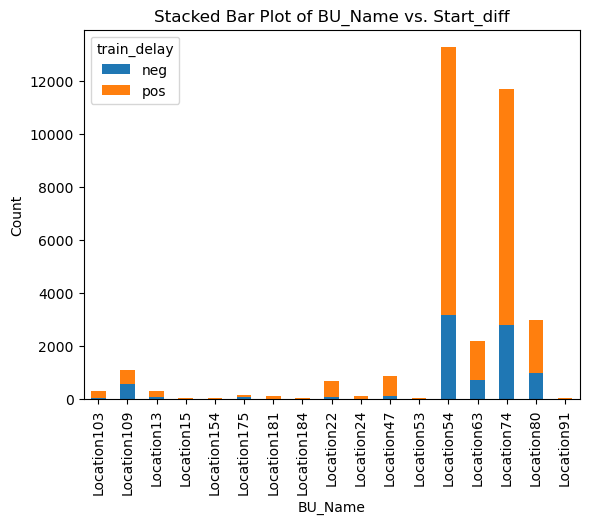

In [30]:
stack_viz('BU_Name')

4. SalesGrouping

In [20]:
train_delay_cancel('SalesGrouping')

train_delay,neg,pos
SalesGrouping,,
Domestic Clients,1245,4236
Exports,4879,9856
Location38,845,3272
Location8,1878,7833


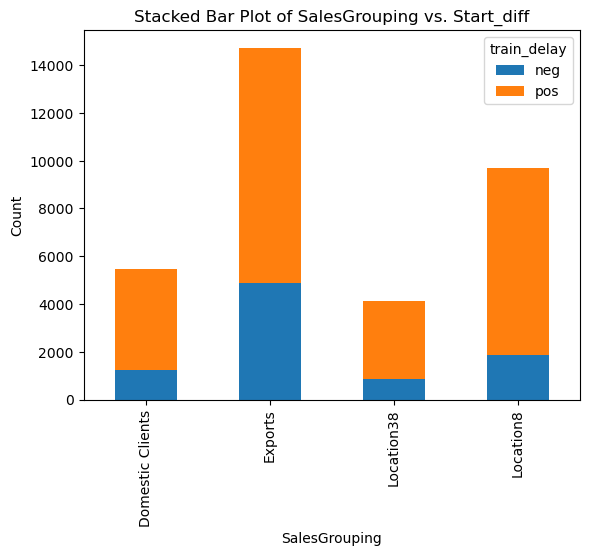

In [31]:
stack_viz('SalesGrouping')

5. Flow_Name

In [21]:
train_delay_cancel('Flow_Name')

train_delay,neg,pos
Flow_Name,,
Location105 to Location125,500,477
Location105 to Location125 (Location162 from Location15),13,8
Location105 to Location125 (Location40 from Location15),1,2
Location105 to Location83 (CoAL),0,19
Location109 to Location25-West,0,2
...,...,...
Location74 to Location98,576,2385
Location80 to Location125 (58t),163,274
Location80 to Location125 (Location162 - Location40),378,566


6. By Flow_Source

In [22]:
train_delay_cancel('Flow_Source')

train_delay,neg,pos
Flow_Source,,
Location109,564,531
Location13,137,455
Location15,20,35
Location154,11,31
Location175,79,89
Location181,24,103
Location184,10,18
Location24,25,98
Location47,129,756


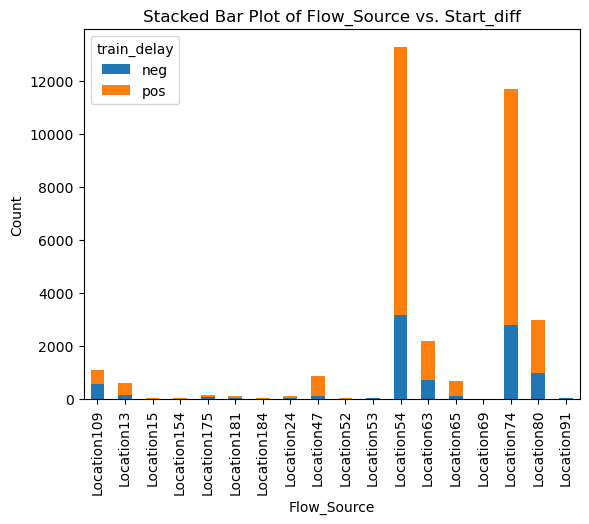

In [33]:
stack_viz('Flow_Source')

7. By Flow_Destination

In [23]:
train_delay_cancel('Flow_Destination')

train_delay,neg,pos
Flow_Destination,,
Location108,66,164
Location110,368,1588
Location12,73,187
Location123,291,1346
Location123 West,17,4
Location125,4709,9143
Location14,33,194
Location151,18,398
Location153,73,162


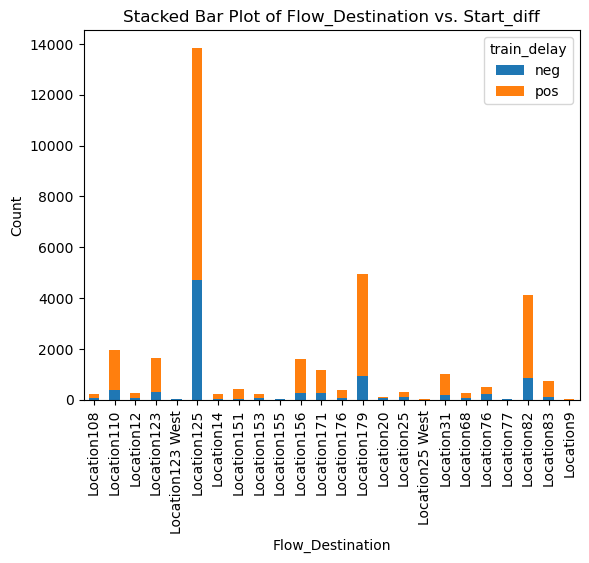

In [34]:
stack_viz('Flow_Destination')

8. By SP_Name

In [24]:
train_delay_cancel('SP_Name')

train_delay,neg,pos
SP_Name,,
Coking Coal - Semi Soft Peas & Smal Nuts,7,1233
Coking Coal - Semi Soft Unsized,2,3176
Coking Coal - Unsized,1,262
Lean Coal,2,351
Market Coal - Unsized,1,2028
Metallurgical - Peas,14,2165
None Selected,8753,62
Small Nuts,3,168
Steam - Duff,6,1369


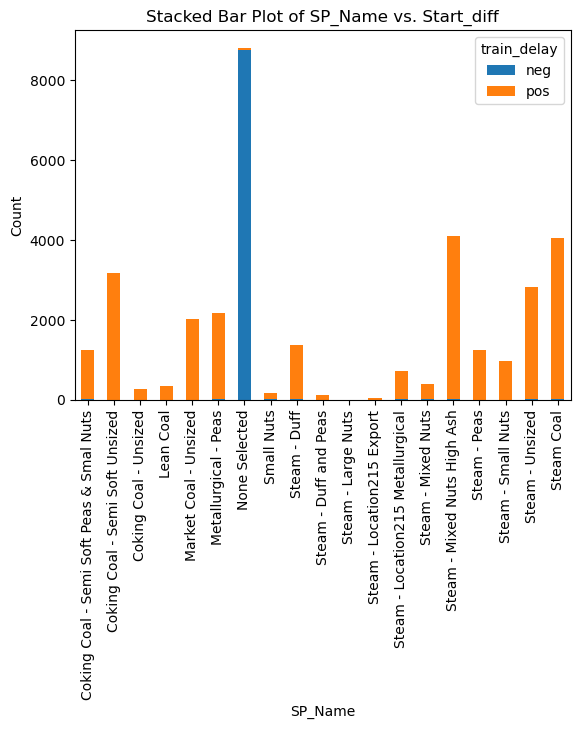

In [35]:
stack_viz('SP_Name')

9. By Wagon Type

In [25]:
train_delay_cancel('Wagon_Type')

train_delay,neg,pos
Wagon_Type,,
ASJ,16,1901
BA,3,252
BALJ,0,241
BOG,0,1
BOG/DZ,0,5
CAD,0,115
CAJ,0,52
CAL,7,1896
CCL,31,7965


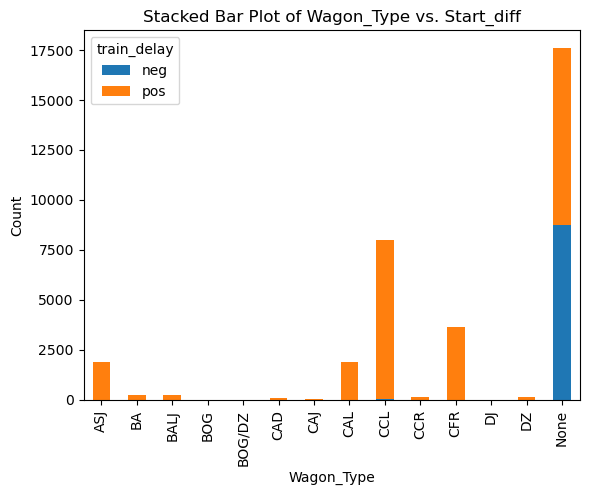

In [36]:
stack_viz('Wagon_Type')

10. Planned tonnes VS actual tonnes

In [39]:
# creata a new feature to for load tonnes deviation
reports['Load_tonnes_dev'] = reports['Act_Volume'] - reports['CNWB_Volume']

In [40]:
reports['Load_tonnes_dev'].describe()

count    33987.000000
mean      -501.729998
std       2453.727483
min      -8500.000000
25%       -288.870000
50%        -18.650000
75%         55.595000
max      73135.400000
Name: Load_tonnes_dev, dtype: float64

In [43]:
reports[reports['Load_tonnes_dev'] > 0.0]['train_delay'].value_counts()

pos    13211
neg       20
Name: train_delay, dtype: int64

In [44]:
reports[reports['Load_tonnes_dev'] <= 0.0]['train_delay'].value_counts()

pos    11966
neg     8790
Name: train_delay, dtype: int64

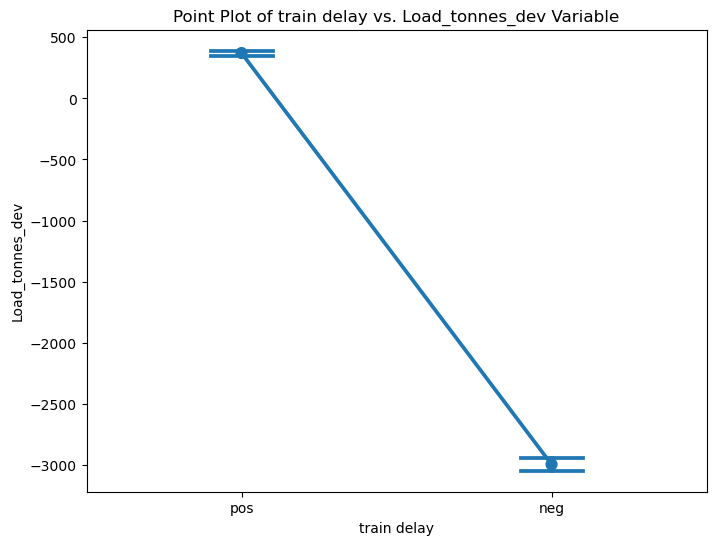

In [45]:
# data vis of how load affect the train delay
plt.figure(figsize=(8, 6))
sns.pointplot(x='train_delay', y='Load_tonnes_dev', data=reports, capsize=0.2)
plt.title('Point Plot of train delay vs. Load_tonnes_dev Variable')
plt.xlabel('train delay')
plt.ylabel('Load_tonnes_dev')
plt.show()

- We can learn from above plots that if load tonnes deviation is greater than zero then trains are more likely to get delayed.

11. Planned wagons VS actual wagons

In [46]:
# create a new feature for wagons deviation
reports['wagons_dev']  = reports['Act_Wagons'] - reports['CNWB_Wagons']

In [47]:
reports['wagons_dev'].describe()

count    33999.000000
mean        -9.091679
std         36.871994
min       -370.000000
25%         -5.000000
50%          0.000000
75%          0.000000
max        104.000000
Name: wagons_dev, dtype: float64

In [48]:
reports[reports['wagons_dev'] > 0.0]['train_delay'].value_counts()

pos    3955
neg       8
Name: train_delay, dtype: int64

In [49]:
reports[reports['wagons_dev'] <= 0.0]['train_delay'].value_counts()

pos    21224
neg     8812
Name: train_delay, dtype: int64

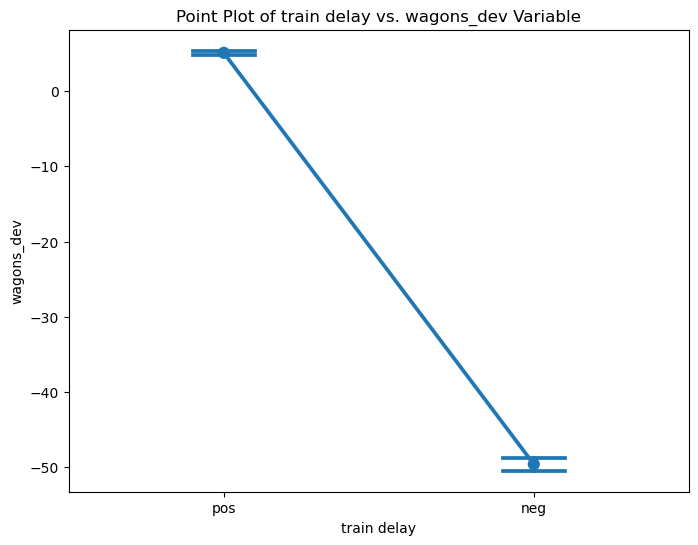

In [50]:
# data vis of how wagons affect the train delay
plt.figure(figsize=(8, 6))
sns.pointplot(x='train_delay', y='wagons_dev', data=reports, capsize=0.2)
plt.title('Point Plot of train delay vs. wagons_dev Variable')
plt.xlabel('train delay')
plt.ylabel('wagons_dev')
plt.show()

- Here's it's clear that if wagon deviation is positive from plannes then it can have high chances of delay, but it is not alone the reason behind the train delays

In [52]:
# analyse mulitple columns to see intercolumns factors
multi_cross_tab = pd.crosstab(reports['train_delay'], [reports['BU_Name'], reports['Flow_Source'], reports['Flow_Source'], reports['Train Status']])
multi_cross_tab

BU_Name      Location103                                                    \
Flow_Source   Location13                                                     
Flow_Source   Location13                                                     
Train Status Extra Train Train Cancelled Train Plan Not Approved Train Ran   
train_delay                                                                  
neg                    0              25                      14         2   
pos                   17               0                       0       220   

BU_Name                                                        Location109  \
Flow_Source       Location52                                   Location109   
Flow_Source       Location52                                   Location109   
Train Status Train Cancelled Train Plan Not Approved Train Ran Extra Train   
train_delay                                                                  
neg                       19                       1         0           1   
pos                        0                       0        14         102   

BU_Name                                               ... Location74  \
Flow_Source                                           ... Location74   
Flow_Source                                           ... Location74   
Train Status Train Cancelled Train Plan Not Approved  ...  Train Ran   
train_delay                                           ...              
neg                      257                     306  ...         17   
pos                        0                       0  ...       8385   

BU_Name       Location80                                   \
Flow_Source   Location80                                    
Flow_Source   Location80                                    
Train Status Extra Train Not executed yet Train Cancelled   
train_delay                                                 
neg                    1                3             336   
pos                  237                0               0   

BU_Name                                         Location91                  \
Flow_Source                                     Location91                   
Flow_Source                                     Location91                   
Train Status Train Plan Not Approved Train Ran Extra Train Train Cancelled   
train_delay                                                                  
neg                              644         3           0               7   
pos                                0      1757           1               0   

BU_Name                                         
Flow_Source                                     
Flow_Source                                     
Train Status Train Plan Not Approved Train Ran  
train_delay                                     
neg                               19         0  
pos                                0         9  

[2 rows x 82 columns]